# Simulated dataset from diffusion tensor model

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import numpy as np

from dataloader import load_dt_simulated
from preprocessing.data_augmentation import extend_dataset_with_origin_reflections

The dataset is simulated by using the diffusion tensor model backwards i.e. instead of estimating the model parameters, the parameters are given and the diffusion-weighted signals are computed instead. Finally Gaussian noise is added to the signals.

There are several hyperparameters that can be used to produce a wide variety of datasets.
- Number of data points to be generated
- The non-zero b-value
- The non-diffusion-weighted $b=0$ signal
- Whether to simulate $b=0$ measurements
- Variance of Gaussian noise
- Diffusion tensor eigenvalues
- Diffusion tensor eigenvectors
- Random generator seed

The diffusion tensor is computed by employing the eigendecomposition backwards (Eq 1):

$$D=Q \Lambda Q^{-1}$$

wher $D$ is the diffusion tensor, $Q$ is a square matrix with eigenvectors as its columns and $\Lambda$ is a diagonal matrix with eigenvalues on its diagonal. The eigenvalue $\Lambda_{ii}$ corresponds to the eigenvector in $i$th column of $Q$ (the eigenvectors are orthornormal vectors and the eigenvalues are sorted in descending order).

The eigenvalues were chosen to be the average of the most anisotropic voxels in the HCP dataset. The anisotropy was determined by fitting the DT model and computing the fractional anisotropy.

In [2]:
bvals, qhat, dwis = load_dt_simulated.load_dt_simulated(number_of_data_points=90, b_value=1000, b_0_signal=3000, include_b_0=False, noise_standard_deviation=100, eigenvalues=(0.003, 0.0002, 0.0002), eigenvectors=None, noise_type='rician', noise_generator=np.random.default_rng(1), gradient_generator=np.random.default_rng(1))

dwis

array([2489.19345619,  303.04494381,  286.54749385,  235.96674262,
       1471.11533248, 2359.53644877,  674.64239339, 1468.33372972,
        264.76388637, 1633.41085226, 2446.29630285, 1222.29664171,
        222.12480848,  481.8582626 , 2171.55919354, 2660.66537435,
        641.11054923, 1107.98602978, 1213.25687726,  661.09969005,
       1439.61689832, 1279.4269581 ,  750.18654332,  419.20463959,
        263.03150336,  604.60093113,  922.29634045, 1170.19522659,
       1245.68553631,  227.22243482, 1249.73217837,  199.7739056 ,
        265.17645979,  438.09647121,  373.54613877, 1486.92978869,
        311.74042571,  507.37173378, 1362.55099688, 1487.78150924,
       2255.31454492,  501.53555308,  648.09709361,  616.6927723 ,
        528.89594781, 1248.59030749, 1527.84660734, 2567.4372105 ,
       2440.27868779,  733.6554543 ,  209.62595398,  835.2387459 ,
        666.40242654,  902.73991609, 1258.27204319, 1540.9486498 ,
       1286.74485783,  887.13006091, 2024.61442509, 2352.68974

## Plot the simulated dataset

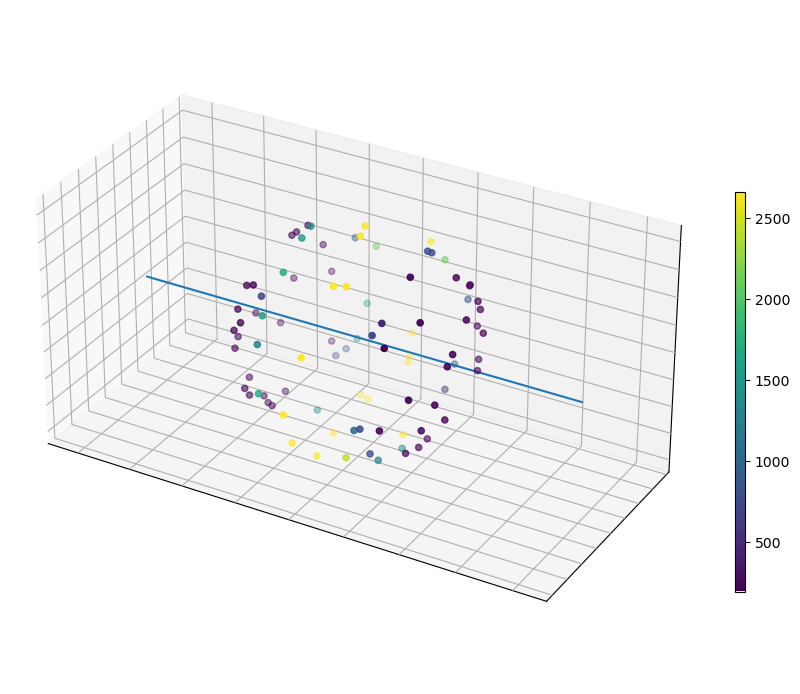

In [3]:
#%matplotlib qt

voxel = dwis

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

# Remove ticks
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.xaxis.set_tick_params(color=(0, 0, 0, 0))
ax.yaxis.set_tick_params(color=(0, 0, 0, 0))
ax.zaxis.set_tick_params(color=(0, 0, 0, 0))

ax.scatter(qhat[0],qhat[1],qhat[2],c=voxel,vmin=1000,vmax=2000)
ax.plot([-2,2],[0,0],[0,0])
ax.set_aspect('equal')

# Add colorbar
cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(voxel), vmax=np.max(voxel))
sm = cm.ScalarMappable(cmap=cmap, norm=normalization)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()

## Pre-processing

Add reflections through the origin to the dataset

In [4]:
bvals, qhat, dwis = extend_dataset_with_origin_reflections(bvals, qhat, dwis)

## Plot the pre-processed dataset

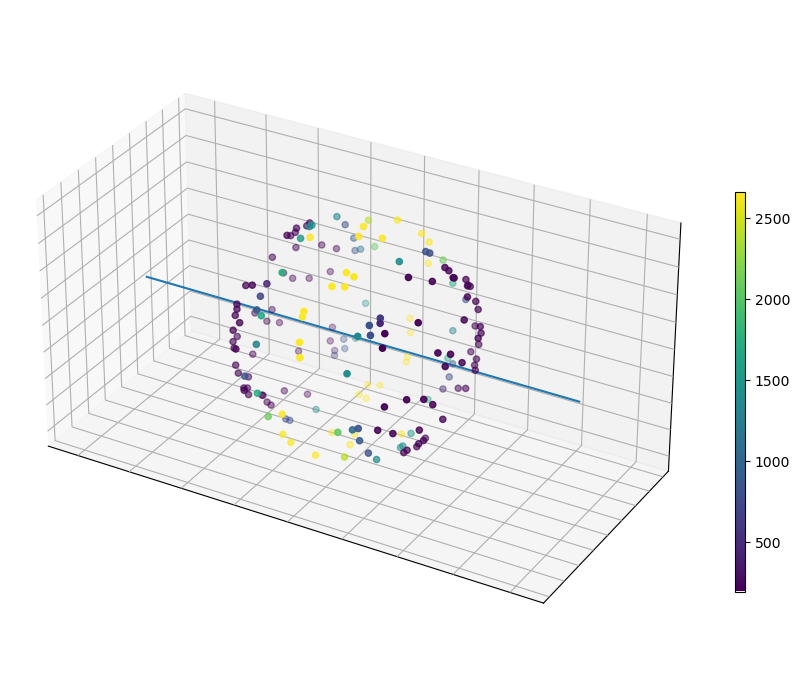

In [5]:
voxel = dwis

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

# Remove ticks
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.xaxis.set_tick_params(color=(0, 0, 0, 0))
ax.yaxis.set_tick_params(color=(0, 0, 0, 0))
ax.zaxis.set_tick_params(color=(0, 0, 0, 0))

ax.scatter(qhat[0],qhat[1],qhat[2],c=voxel,vmin=1000,vmax=2000)
ax.plot([-2,2],[0,0],[0,0])
ax.set_aspect('equal')

# Add colorbar
cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(voxel), vmax=np.max(voxel))
sm = cm.ScalarMappable(cmap=cmap, norm=normalization)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()

## Add multiple fibre populations to the dataset

In order to simulate a multi-population dataset, mutliple single-population datasets need to be created as described above. Then the signals from each single-population dataset is weighted by its voxel volume fraction and the signals are then summed together:

$$S_{multi}(\theta, \phi) = \sum_{i}^{N}f_{i}S_{single_{i}}(\theta, \phi)$$

where $f_{i}$ is the volume fraction of the *i*-th population and $S_{single_{i}}(\theta, \phi)$ is the signal from the *i*-th population and $N$ is the number of populations in the voxel.

In [6]:
bvals_multi, qhat_multi, dwis_multi = load_dt_simulated.load_dt_simulated_multiple_populations(number_of_data_points=90, b_value=1000, b_0_signal=3000, include_b_0=False, noise_standard_deviation=100, eigenvalues=[(0.003, 0.0002, 0.0002),(0.0002, 0.003, 0.0002)], eigenvectors=[None,None], fractions=[0.5,0.5], noise_type='rician', noise_generator_seed=1, gradient_generator_seed=1)

In [7]:
dwis_multi

array([1482.64062144,  978.12117193, 1197.65504978,  748.5364298 ,
       1016.42857104, 1275.3167839 ,  872.73943895, 1935.77799879,
        854.62118255, 1310.15011793, 1321.23119017, 1748.91627429,
       1038.39920927, 1271.68280922, 1602.47364929, 2659.15343604,
        722.66249527, 1043.7386019 ,  946.47238447,  625.9984239 ,
        802.46632278,  910.06448116, 1297.60811659,  657.56324545,
       1269.45357963, 1328.51044164,  778.18341842, 1122.24717861,
        998.0131525 ,  988.19982676,  807.97505186,  775.93163148,
       1083.67313042,  762.86484847, 1113.08840451, 1979.05644308,
        860.85675582,  989.50265853,  838.21878559,  881.94629853,
       1358.64759823, 1179.37451877,  889.3389482 ,  611.61214222,
        993.94859214, 1773.96180306, 1987.33492008, 1770.73806807,
       1407.25256186, 1512.17827554, 1176.07029166,  764.91773745,
       1421.02207562, 1524.83554005,  890.38679294, 1818.44696522,
        862.67978282,  878.79193893, 2204.7013384 , 1246.70315

## Multi-population dataset pre-processing

In [8]:
bvals_multi, qhat_multi, dwis_multi = extend_dataset_with_origin_reflections(bvals_multi, qhat_multi, dwis_multi)

## Plot the pre-processed multi-population dataset

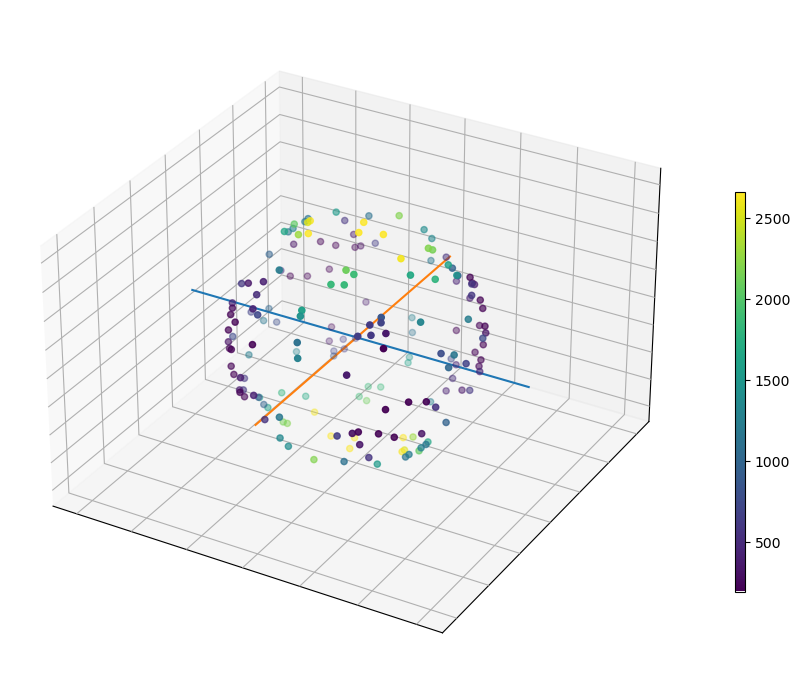

In [9]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

# Remove ticks
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.xaxis.set_tick_params(color=(0, 0, 0, 0))
ax.yaxis.set_tick_params(color=(0, 0, 0, 0))
ax.zaxis.set_tick_params(color=(0, 0, 0, 0))

ax.scatter(qhat_multi[0],qhat_multi[1],qhat_multi[2],c=dwis_multi,vmin=800,vmax=2000)
ax.plot([-1.5,1.5],[0,0],[0,0])
ax.plot([0,0],[-1.5,1.5],[0,0])
ax.set_aspect('equal')

# Add colorbar
cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(voxel), vmax=np.max(voxel))
sm = cm.ScalarMappable(cmap=cmap, norm=normalization)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()